In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.append('../../')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from util.stockdata_helper import (
    get_stockdata_tickers, get_sector_etf_ticker_map
)
from util.file_util import StockDataFileReader
from util.plot_util import plot_time_series

In [4]:
start_date = '2018-01-01'
end_date = '2019-08-10'

In [7]:
# tickers = get_stockdata_tickers()
tickers = list(get_sector_etf_ticker_map().keys())
tickers

['XLF', 'XLU', 'XLP', 'XLK', 'XLI', 'XLB', 'XLC', 'XLV', 'XLY', 'XLRE', 'XLE']

In [8]:
stock_data_reader = StockDataFileReader()

In [9]:
sample_ticker = np.random.choice(tickers)
sample_ticker

'XLP'

In [10]:
temp = stock_data_reader.read_stockdata_in_range(sample_ticker,
                                                 start_date,
                                                 end_date)

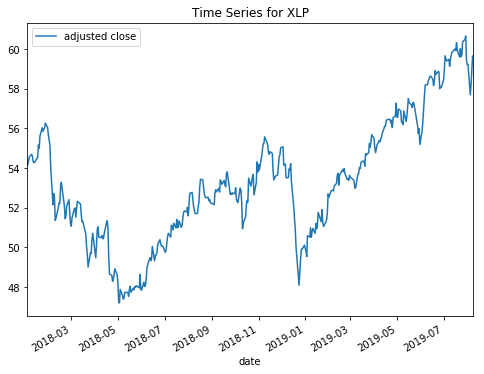

In [11]:
plot_time_series(temp,
                 title='Time Series for {}'.format(sample_ticker))

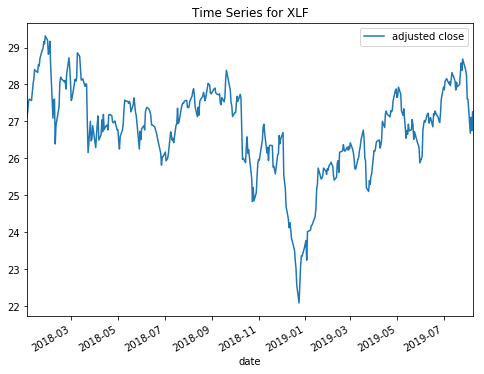

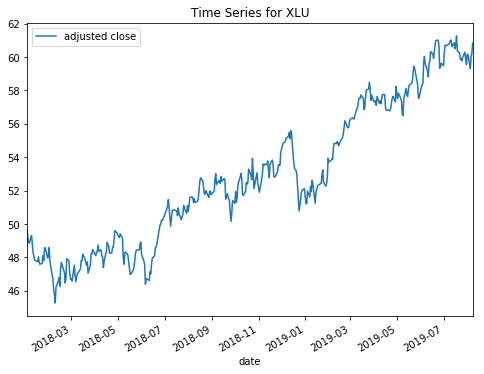

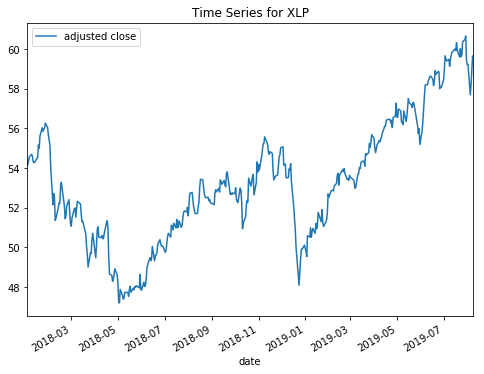

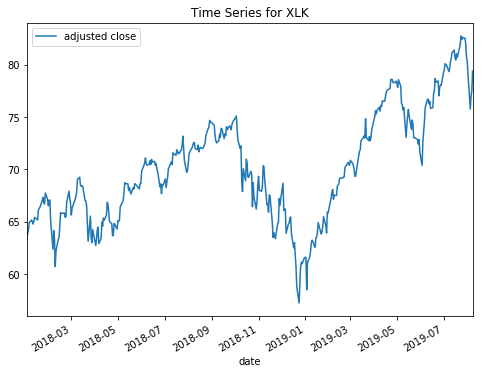

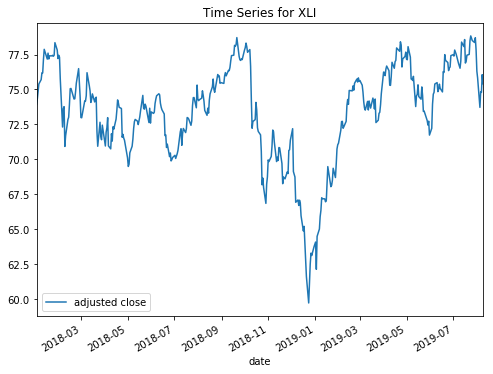

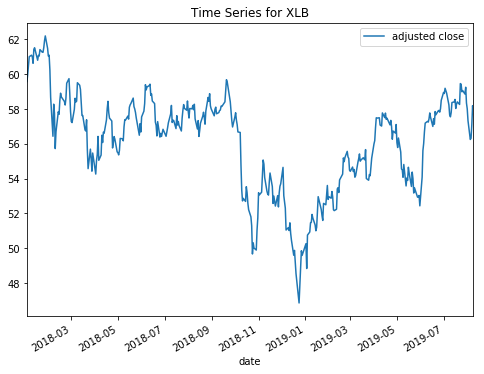

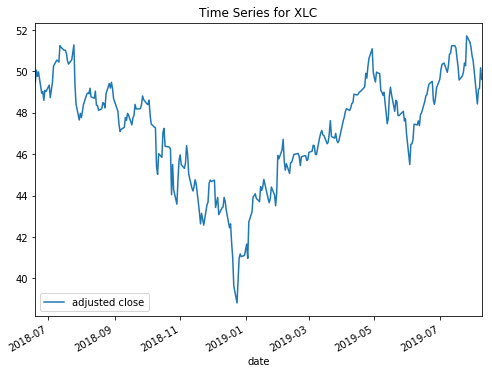

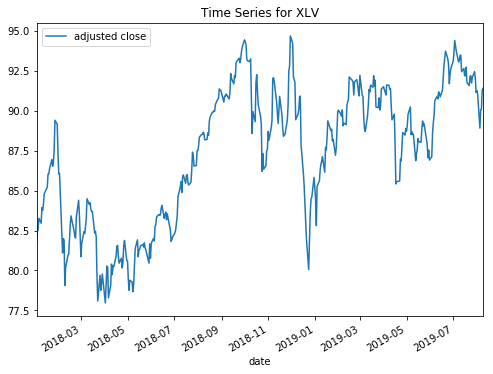

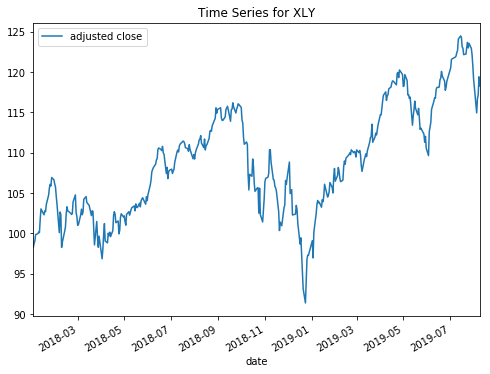

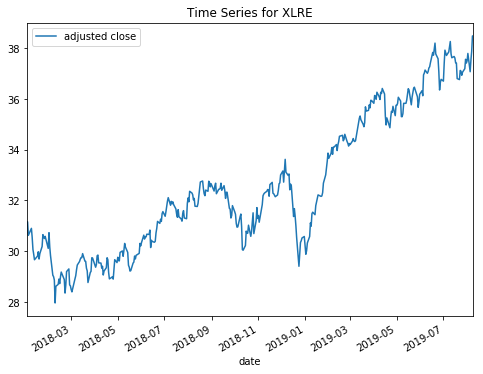

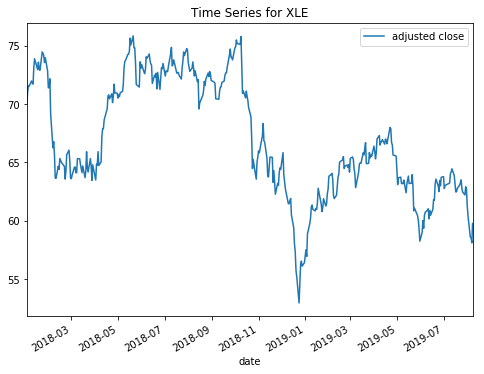

In [12]:
for ticker in tickers:
    ticker_df = stock_data_reader.read_stockdata_in_range(ticker,
                                                          start_date,
                                                          end_date,
                                                          columns=['date', 'adjusted close'])
    
    title = 'Time Series for {}'.format(ticker)
    plot_time_series(ticker_df,
                     title=title)
    plt.show()

## Check for large holes in data

In [13]:
all_dates = set()

In [14]:
for ticker in tickers:
    ticker_df = stock_data_reader.read_stockdata_in_range(ticker,
                                                          start_date,
                                                          end_date,
                                                          columns=['date', 'adjusted close'])
    all_dates = all_dates | set(ticker_df.index.strftime('%Y-%m-%d'))

In [15]:
for ticker in tickers:
    ticker_df = stock_data_reader.read_stockdata_in_range(ticker,
                                                          start_date,
                                                          end_date,
                                                          columns=['date', 'adjusted close'])
    
    missing_dates = all_dates - set(ticker_df.index.strftime('%Y-%m-%d'))
    if len(missing_dates):
        print('{} - missing {} dates'.format(ticker, len(missing_dates)))
        sorted_missing_dates = sorted(missing_dates)
        print('missing data start: ', sorted_missing_dates[0])
        print('missing data end: ', sorted_missing_dates[-1])
        print('\n')
    

XLC - missing 116 dates
missing data start:  2018-01-02
missing data end:  2018-06-18




#### No dates missing among our tickers so far

Beyond Meat IPO'ed on 2019/5/2

### Sanity Check

In [18]:
from util.stockdata_helper import (
    get_nday_returns_for_ticker, get_nday_mkt_adjusted_returns_for_ticker)

In [19]:
prices_df = stock_data_reader.read_stockdata_in_range('SPY',
                                                      start_date, 
                                                      end_date)

In [20]:
returns_df = get_nday_returns_for_ticker('SPY', start_date, end_date)
mkt_adjust_returns_df = get_nday_mkt_adjusted_returns_for_ticker('SPY', start_date, end_date)

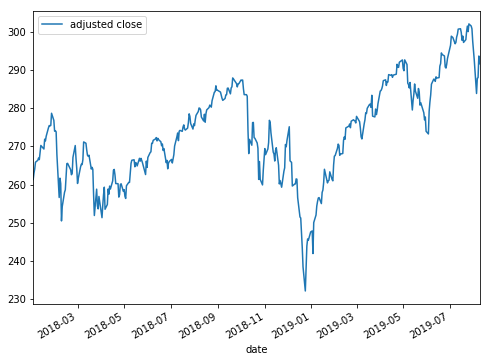

In [21]:
plot_time_series(prices_df)

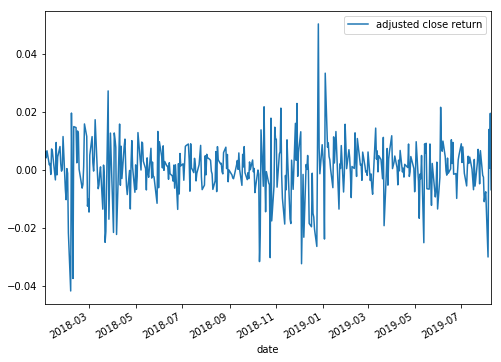

In [22]:
plot_time_series(returns_df)

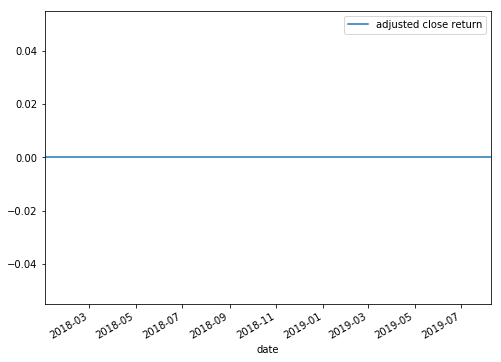

In [23]:
plot_time_series(mkt_adjust_returns_df)